c:\Users\nicar\anaconda3\envs\my_dev\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nicar\anaconda3\envs\my_dev\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nicar\anaconda3\envs\my_dev\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nicar\anaconda3\envs\my_dev\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwar

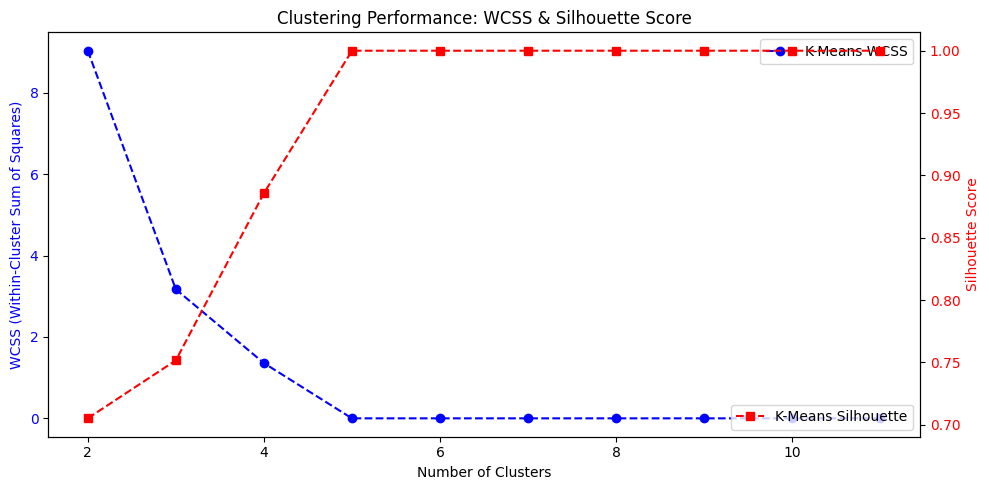

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# --- Load Data ---
file_path = "data/kmeans_cosine_clustering_results_5_1-1_threshold_0.3.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Assuming the dataset has states as rows and correlation features as columns
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
X = df_numeric.to_numpy()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Perform Clustering for Multiple Cluster Counts ---
cluster_range = list(range(2, 12))
wcss_kmeans = []
# wcss_hierarchical = []

silhouette_kmeans = []
# silhouette_hierarchical = []

for n_clusters in cluster_range:
    # --- K-Means Clustering ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    # Store metrics
    wcss_kmeans.append(kmeans.inertia_)
    silhouette_kmeans.append(silhouette_score(X_scaled, kmeans_labels))

    # # --- Hierarchical Clustering ---
    # hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    # hierarchical_labels = hierarchical.fit_predict(X_scaled)

    # # Compute WCSS for hierarchical clustering (sum of squared distances to cluster mean)
    # cluster_centroids = np.array([X_scaled[hierarchical_labels == i].mean(axis=0) for i in range(n_clusters)])
    # cluster_distances = np.array([np.sum((X_scaled[hierarchical_labels == i] - cluster_centroids[i]) ** 2) for i in range(n_clusters)])
    # wcss_hierarchical.append(np.sum(cluster_distances))

    # silhouette_hierarchical.append(silhouette_score(X_scaled, hierarchical_labels))

# --- Plot WCSS & Silhouette Score ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# WCSS on Left Y-Axis
ax1.plot(cluster_range, wcss_kmeans, 'bo-', label="K-Means WCSS", linestyle="dashed")
# ax1.plot(cluster_range, wcss_hierarchical, 'go-', label="Hierarchical WCSS", linestyle="dashed")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("WCSS (Within-Cluster Sum of Squares)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Silhouette Scores on Right Y-Axis
ax2 = ax1.twinx()
ax2.plot(cluster_range, silhouette_kmeans, 'rs-', label="K-Means Silhouette", linestyle="dashed")
# ax2.plot(cluster_range, silhouette_hierarchical, 'g^-', label="Hierarchical Silhouette", linestyle="dashed")
ax2.set_ylabel("Silhouette Score", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Legends
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")
plt.title("Clustering Performance: WCSS & Silhouette Score")
fig.tight_layout()
plt.show()

